In [75]:
#Gerekli k√ºt√ºphaneleri i√ße aktar - English: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Grafik ayarlarƒ± - Plotting settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [5]:
# Veri setini y√ºkle - Load the dataset
df = pd.read_csv("Students Social Media Addiction.csv")

In [7]:
# ƒ∞lk 5 satƒ±rƒ± g√∂ster - Show first 5 rows
print(df.head())

   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  Conflicts_Over_Soc

In [9]:
# Eksik deƒüerleri g√∂ster - Show missing values
missing_values = df.isnull().sum().to_frame(name="Missing_Count")
missing_values["Missing_Percent"] = (missing_values["Missing_Count"] / len(df)) * 100
print(" Eksik Deƒüerler / Missing Values:")
print(missing_values.sort_values(by="Missing_Count", ascending=False))


 Eksik Deƒüerler / Missing Values:
                              Missing_Count  Missing_Percent
Student_ID                                0              0.0
Age                                       0              0.0
Gender                                    0              0.0
Academic_Level                            0              0.0
Country                                   0              0.0
Avg_Daily_Usage_Hours                     0              0.0
Most_Used_Platform                        0              0.0
Affects_Academic_Performance              0              0.0
Sleep_Hours_Per_Night                     0              0.0
Mental_Health_Score                       0              0.0
Relationship_Status                       0              0.0
Conflicts_Over_Social_Media               0              0.0
Addicted_Score                            0              0.0


In [11]:
#Kategorik s√ºtunlarƒ± analiz et - Analyze categorical columns
categorical_cols = df.select_dtypes(include="object").columns

for col in categorical_cols:
    print(f"\nüîπ {col} daƒüƒ±lƒ±mƒ± / Distribution of {col}")
    print(df[col].value_counts())
    print("Y√ºzdelik / Percentage:")
    print(df[col].value_counts(normalize=True) * 100)



üîπ Gender daƒüƒ±lƒ±mƒ± / Distribution of Gender
Gender
Female    353
Male      352
Name: count, dtype: int64
Y√ºzdelik / Percentage:
Gender
Female    50.070922
Male      49.929078
Name: proportion, dtype: float64

üîπ Academic_Level daƒüƒ±lƒ±mƒ± / Distribution of Academic_Level
Academic_Level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64
Y√ºzdelik / Percentage:
Academic_Level
Undergraduate    50.070922
Graduate         46.099291
High School       3.829787
Name: proportion, dtype: float64

üîπ Country daƒüƒ±lƒ±mƒ± / Distribution of Country
Country
India        53
USA          40
Canada       34
Denmark      27
Ireland      27
             ..
Uruguay       1
Ecuador       1
Venezuela     1
Peru          1
Jamaica       1
Name: count, Length: 110, dtype: int64
Y√ºzdelik / Percentage:
Country
India        7.517730
USA          5.673759
Canada       4.822695
Denmark      3.829787
Ireland      3.829787
               ...   
Uruguay      0.14184

In [13]:
#Sayƒ±sal deƒüi≈ükenlerin √∂zet istatistikleri - Summary statistics of numerical columns
print(" Sayƒ±sal Deƒüi≈üken √ñzeti / Numerical Summary:")
print(df.describe())


 Sayƒ±sal Deƒüi≈üken √ñzeti / Numerical Summary:
       Student_ID         Age  Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  \
count  705.000000  705.000000             705.000000             705.000000   
mean   353.000000   20.659574               4.918723               6.868936   
std    203.660256    1.399217               1.257395               1.126848   
min      1.000000   18.000000               1.500000               3.800000   
25%    177.000000   19.000000               4.100000               6.000000   
50%    353.000000   21.000000               4.800000               6.900000   
75%    529.000000   22.000000               5.800000               7.700000   
max    705.000000   24.000000               8.500000               9.600000   

       Mental_Health_Score  Conflicts_Over_Social_Media  Addicted_Score  
count           705.000000                   705.000000      705.000000  
mean              6.226950                     2.849645        6.436879  
std              

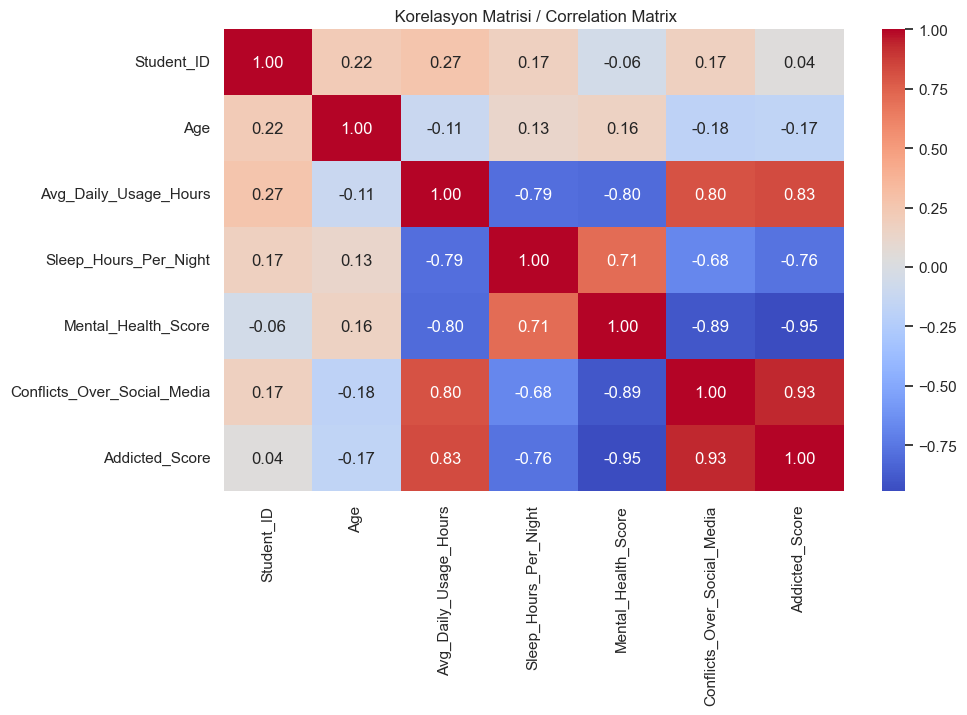

In [15]:
# Sayƒ±sal s√ºtunlar arasƒ±ndaki korelasyonu g√∂rselle≈ütir - Visualize correlation among numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title(" Korelasyon Matrisi / Correlation Matrix")
plt.show()


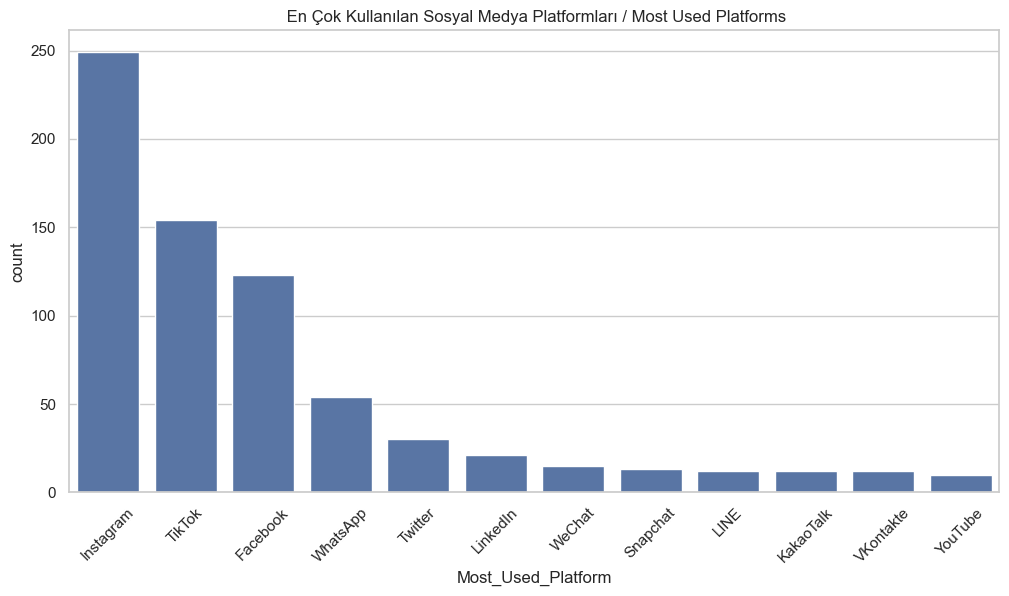

In [17]:
# En √ßok kullanƒ±lan platformlar
sns.countplot(data=df, x="Most_Used_Platform", order=df["Most_Used_Platform"].value_counts().index)
plt.xticks(rotation=45)
plt.title(" En √áok Kullanƒ±lan Sosyal Medya Platformlarƒ± / Most Used Platforms")
plt.show()

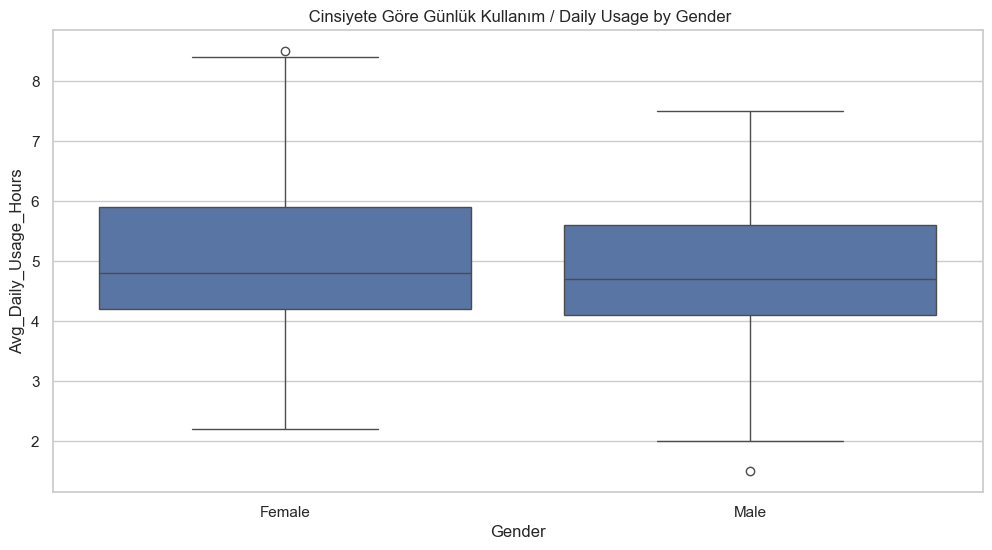

In [19]:
# Sosyal medya kullanƒ±m s√ºresi - cinsiyete g√∂re
sns.boxplot(data=df, x="Gender", y="Avg_Daily_Usage_Hours")
plt.title(" Cinsiyete G√∂re G√ºnl√ºk Kullanƒ±m / Daily Usage by Gender")
plt.show()

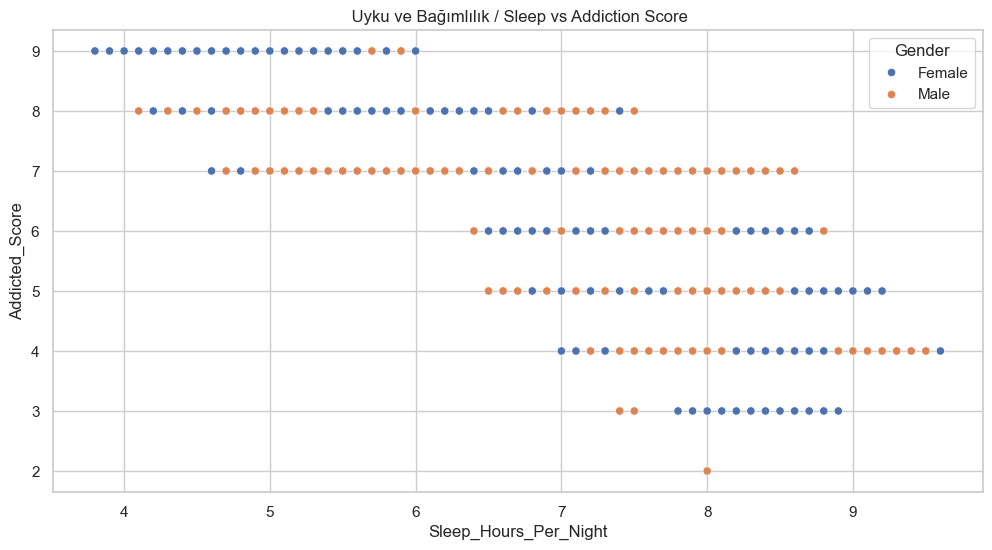

In [21]:
# Uyku s√ºresi ve baƒüƒ±mlƒ±lƒ±k ili≈ükisi
sns.scatterplot(data=df, x="Sleep_Hours_Per_Night", y="Addicted_Score", hue="Gender")
plt.title(" Uyku ve Baƒüƒ±mlƒ±lƒ±k / Sleep vs Addiction Score")
plt.show()

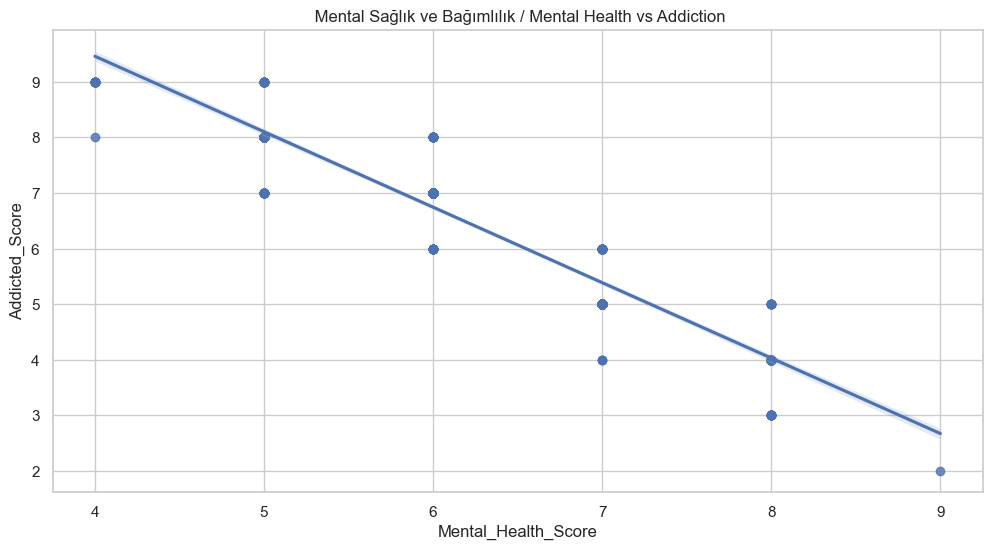

In [23]:
# Mental saƒülƒ±k ve baƒüƒ±mlƒ±lƒ±k ili≈ükisi
sns.regplot(data=df, x="Mental_Health_Score", y="Addicted_Score")
plt.title(" Mental Saƒülƒ±k ve Baƒüƒ±mlƒ±lƒ±k / Mental Health vs Addiction")
plt.show()

In [25]:
# Baƒüƒ±mlƒ± olanlarƒ± 1, olmayanlarƒ± 0 olarak i≈üaretle - Mark addicted individuals as 1, others as 0
df["Is_Addicted"] = df["Addicted_Score"].apply(lambda x: 1 if x >= 7 else 0)

# Uyku kalitesi etiketi
df["Sleep_Quality"] = df["Sleep_Hours_Per_Night"].apply(lambda x: "ƒ∞yi" if x >= 7 else "K√∂t√º")

# Kontrol
print(df[["Addicted_Score", "Is_Addicted", "Sleep_Quality"]].head())


   Addicted_Score  Is_Addicted Sleep_Quality
0               8            1          K√∂t√º
1               3            0           ƒ∞yi
2               9            1          K√∂t√º
3               4            0           ƒ∞yi
4               7            1          K√∂t√º


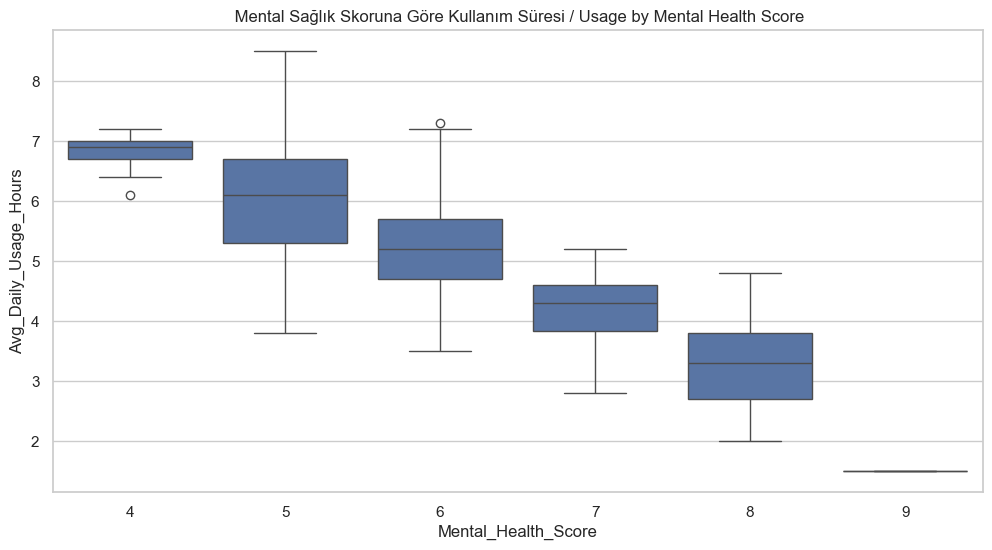

In [27]:
#  Mental saƒülƒ±k skoruna g√∂re ortalama sosyal medya s√ºresi
# Average daily usage by mental health score

sns.boxplot(x="Mental_Health_Score", y="Avg_Daily_Usage_Hours", data=df)
plt.title(" Mental Saƒülƒ±k Skoruna G√∂re Kullanƒ±m S√ºresi / Usage by Mental Health Score")
plt.show()


C:\Users\aziz-\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


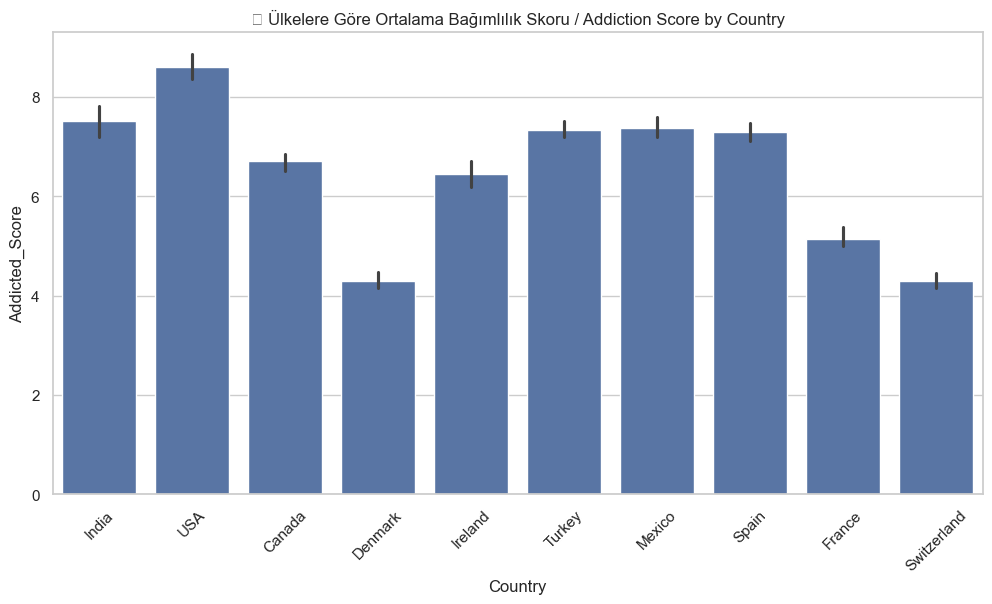

In [29]:
# √úlkeye g√∂re ortalama baƒüƒ±mlƒ±lƒ±k skorlarƒ±
# Average addicted score by country

top_countries = df["Country"].value_counts().head(10).index
sns.barplot(data=df[df["Country"].isin(top_countries)],
            x="Country", y="Addicted_Score", order=top_countries)
plt.xticks(rotation=45)
plt.title("üåç √úlkelere G√∂re Ortalama Baƒüƒ±mlƒ±lƒ±k Skoru / Addiction Score by Country")
plt.show()


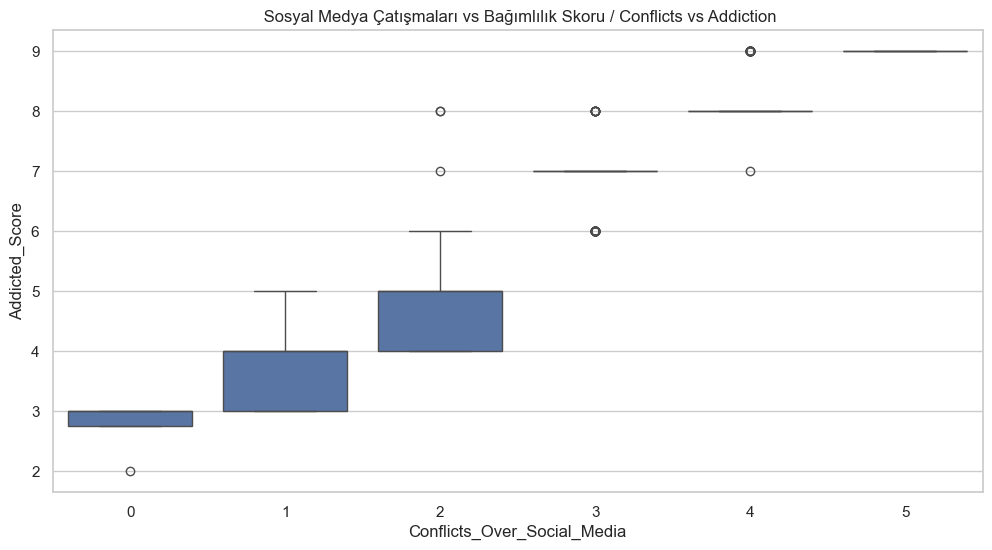

In [31]:
#  √áatƒ±≈üma sayƒ±sƒ± arttƒ±k√ßa baƒüƒ±mlƒ±lƒ±k artƒ±yor mu?
#  Does addiction increase as conflict over social media increases?

sns.boxplot(data=df, x="Conflicts_Over_Social_Media", y="Addicted_Score")
plt.title(" Sosyal Medya √áatƒ±≈ümalarƒ± vs Baƒüƒ±mlƒ±lƒ±k Skoru / Conflicts vs Addiction")
plt.show()


In [33]:
# Baƒüƒ±mlƒ±lƒ±k ve cinsiyet arasƒ±nda ili≈üki var mƒ±? (Ki-kare testi)
# Is there a relationship between gender and addiction? (Chi-square test)

from scipy.stats import chi2_contingency

# √áapraz tablo olu≈ütur
contingency_table = pd.crosstab(df["Gender"], df["Is_Addicted"])

# Ki-kare testi uygula
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi2 deƒüeri / Chi2 value:", chi2)
print("p-deƒüeri / p-value:", p)


Chi2 deƒüeri / Chi2 value: 0.18106855560445376
p-deƒüeri / p-value: 0.6704565444627283


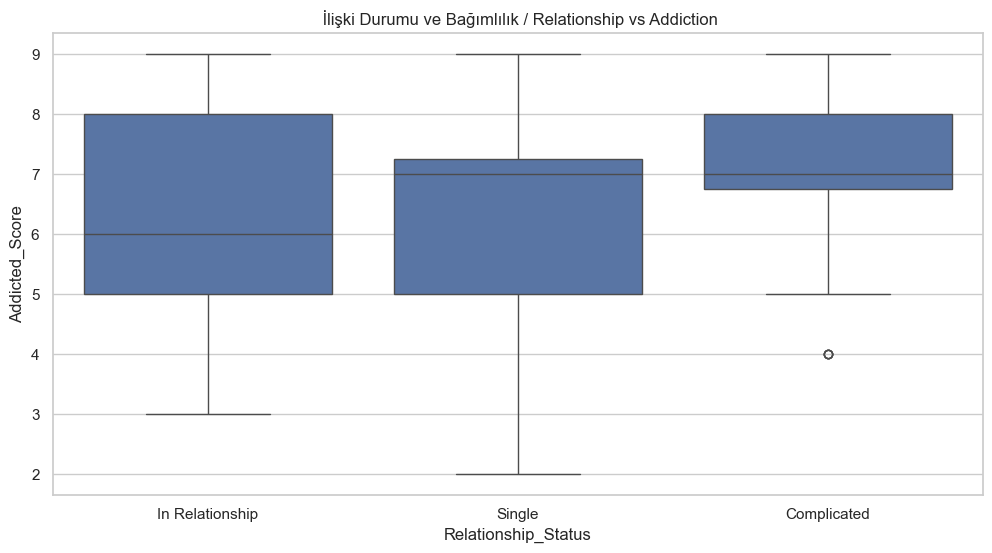

In [43]:
# ƒ∞li≈üki durumu ve baƒüƒ±mlƒ±lƒ±k
# Relationship status vs addiction score

sns.boxplot(data=df, x="Relationship_Status", y="Addicted_Score")
plt.title(" ƒ∞li≈üki Durumu ve Baƒüƒ±mlƒ±lƒ±k / Relationship vs Addiction")
plt.show()


C:\Users\aziz-\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3370: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\aziz-\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3370: UserWarning: 31.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\aziz-\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3370: UserWarning: 38.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\aziz-\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3370: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


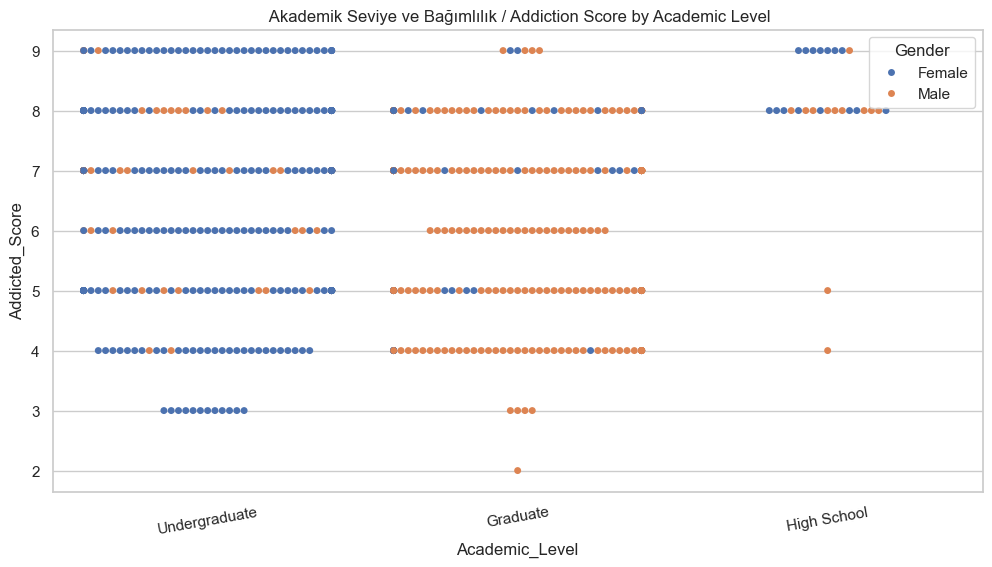

In [77]:
#Akademik Seviye ve Baƒüƒ±mlƒ±lƒ±k / Addiction Score by Academic Level
sns.swarmplot(data=df, x="Academic_Level", y="Addicted_Score", hue="Gender")
plt.title(" Akademik Seviye ve Baƒüƒ±mlƒ±lƒ±k / Addiction Score by Academic Level")
plt.xticks(rotation=10)
plt.show()


C:\Users\aziz-\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


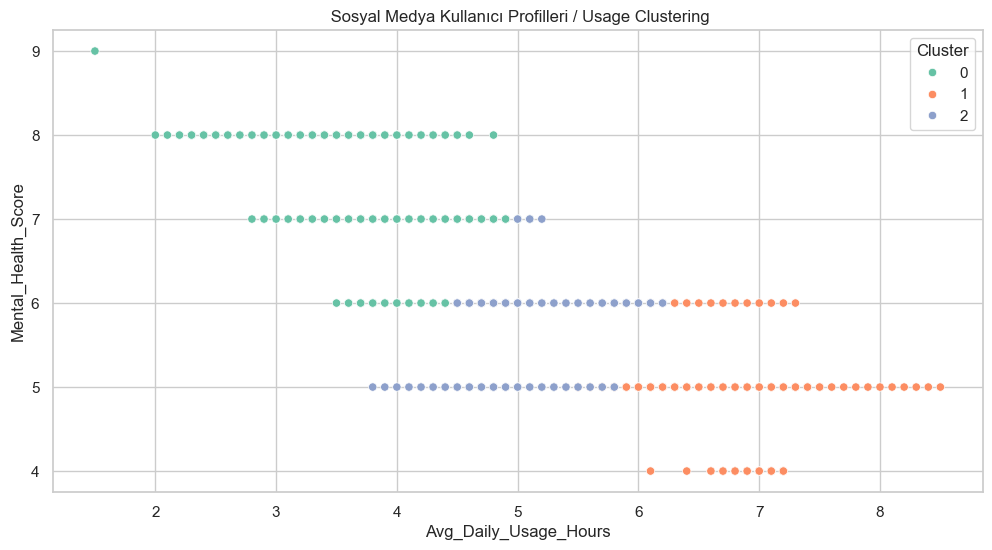

In [79]:
#Sosyal Medya Kullanƒ±cƒ± Profilleri / Usage Clustering
X = df[["Avg_Daily_Usage_Hours", "Mental_Health_Score", "Sleep_Hours_Per_Night"]]
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

sns.scatterplot(data=df, x="Avg_Daily_Usage_Hours", y="Mental_Health_Score", hue="Cluster", palette="Set2")
plt.title(" Sosyal Medya Kullanƒ±cƒ± Profilleri / Usage Clustering")
plt.show()


In [49]:
#  √ñzellik ve hedef se√ßimi
# Baƒüƒ±msƒ±z deƒüi≈ükenler (√∂zellikler)
# Features
features = ["Avg_Daily_Usage_Hours", "Sleep_Hours_Per_Night", "Addicted_Score", "Conflicts_Over_Social_Media"]

In [81]:
# Baƒüƒ±mlƒ± deƒüi≈üken (hedef)
# Target variable
target = "Mental_Health_Score"
X = df[features]
y = df[target]

In [83]:
# Veri setinin ayrƒ±lmasƒ± - Separation of the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
#√ñl√ßeklendirme - Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [87]:
# Random Forest Eƒüitimi -Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [89]:
# √ñzellik √ñnem Skorlarƒ± - Feature Importance Scores
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=True)


C:\Users\aziz-\AppData\Local\Temp\ipykernel_20744\2872843631.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette="viridis")


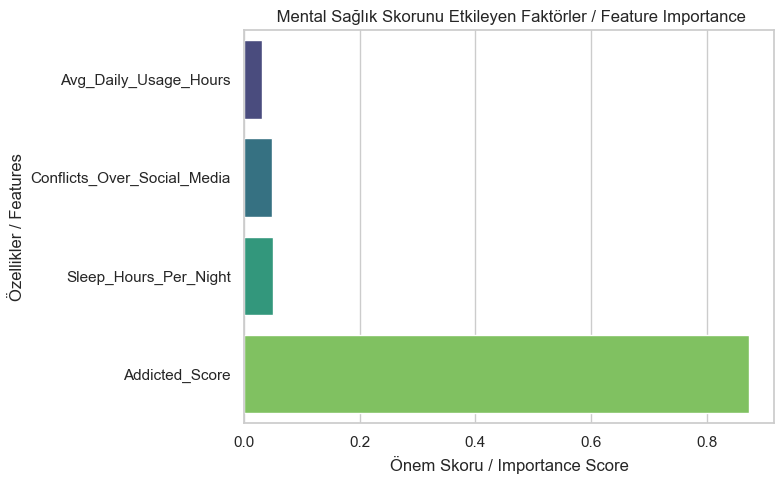

In [71]:
# G√∂rselle≈ütirme
plt.figure(figsize=(8, 5))
sns.barplot(x=importances.values, y=importances.index, palette="viridis")

plt.title(" Mental Saƒülƒ±k Skorunu Etkileyen Fakt√∂rler / Feature Importance")
plt.xlabel("√ñnem Skoru / Importance Score")
plt.ylabel("√ñzellikler / Features")
plt.tight_layout()
plt.show()